1. How to re-size and scale images
2. Image Pyramids
3. Cropping

## Re-sizing
Re-sizing is a sample function that we execute using the cv2.resize function,its arguments are:
cv2.resize(image, dsize(output, image size) x scale, yslcae, intepolation)

#### List of interpolation 
* cv2.INTER_AREA -> Good for shirking or down sampling
* cv2.INTER_NEAREST -> Fatest
* cv2.INTER_LINEAR -> Good for zooming or up sampling 
* cv2.Inter_cubic -> Better
* cv2.INTER_LANCZOS4 - BEST

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def imshow(title = 'Image', image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

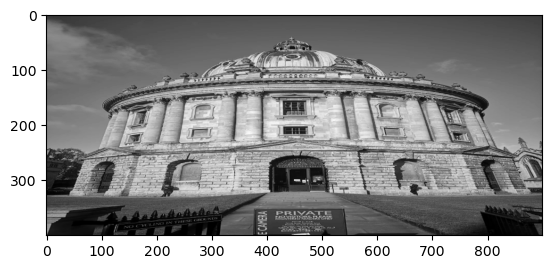

In [3]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\oxfordlibrary.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

#If no interpolation is specified cv.INTER_LINEAR is used as default
#Let's resize the image to 1/2 of its original size
image_scaled = cv2.resize(image, None, fx = 0.75, fy = 0.75)
plt.imshow(image_scaled, cmap='gray')

#Let's double the size of the image
img_scaled2 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
plt.imshow(img_scaled2, cmap='gray')

#Let's double the size of our image using inter_nearest
img_scaled3 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_NEAREST)
plt.imshow(img_scaled3, cmap='gray')

#let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.imshow(img_scaled4, cmap='gray')

## Image pyramids

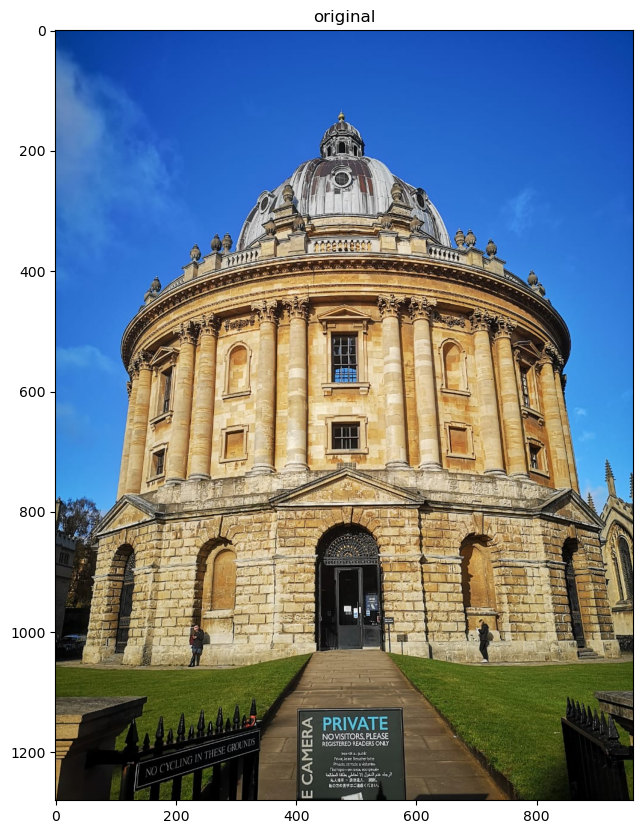

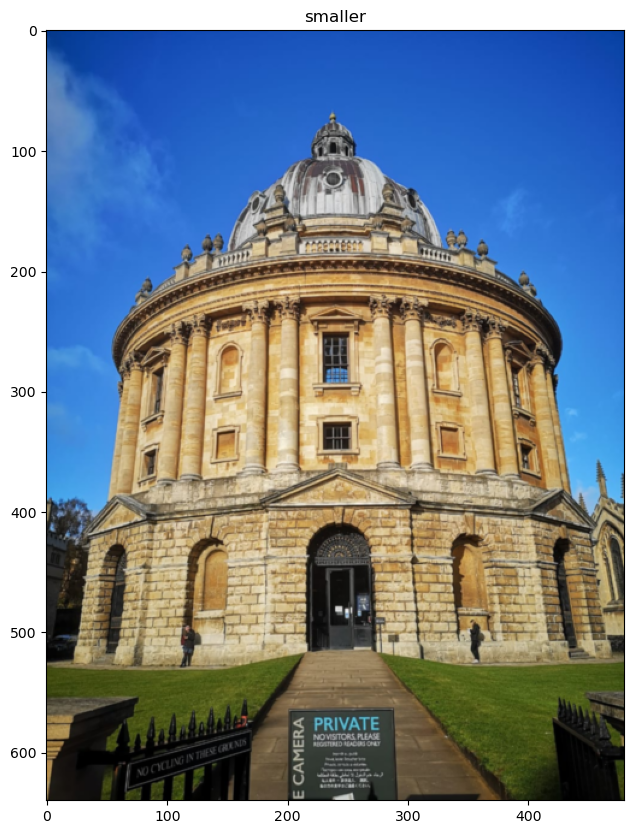

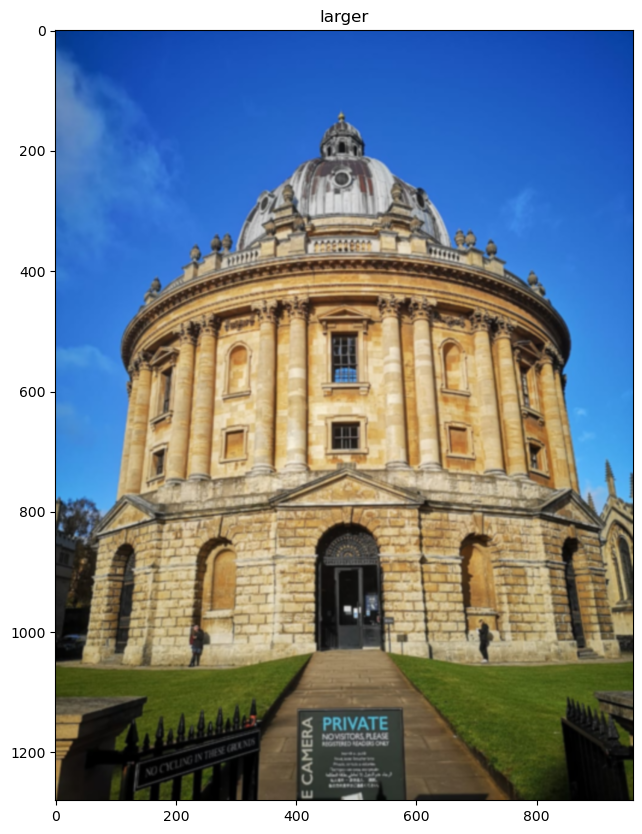

In [6]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\oxfordlibrary.jpeg')
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("original", image)
imshow("smaller", smaller)
imshow("larger", larger)

## Cropping

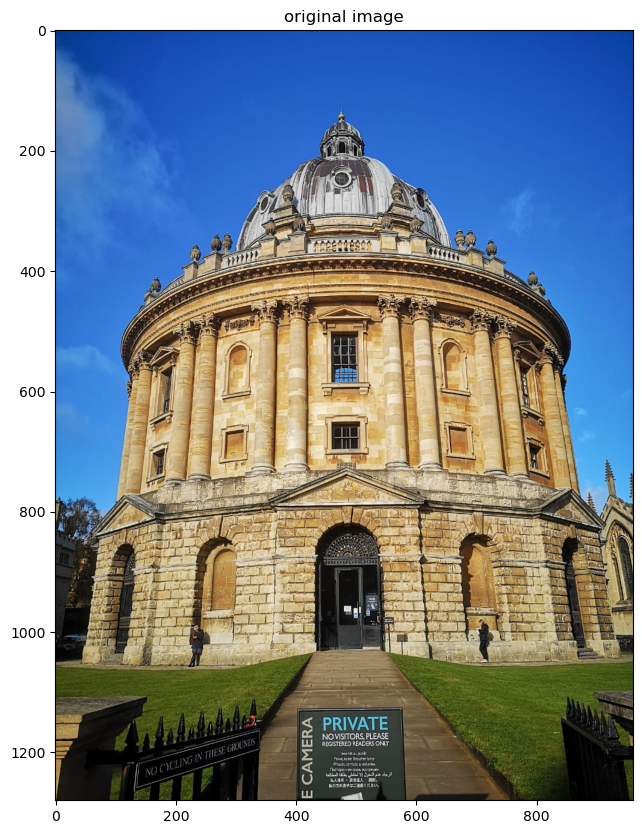

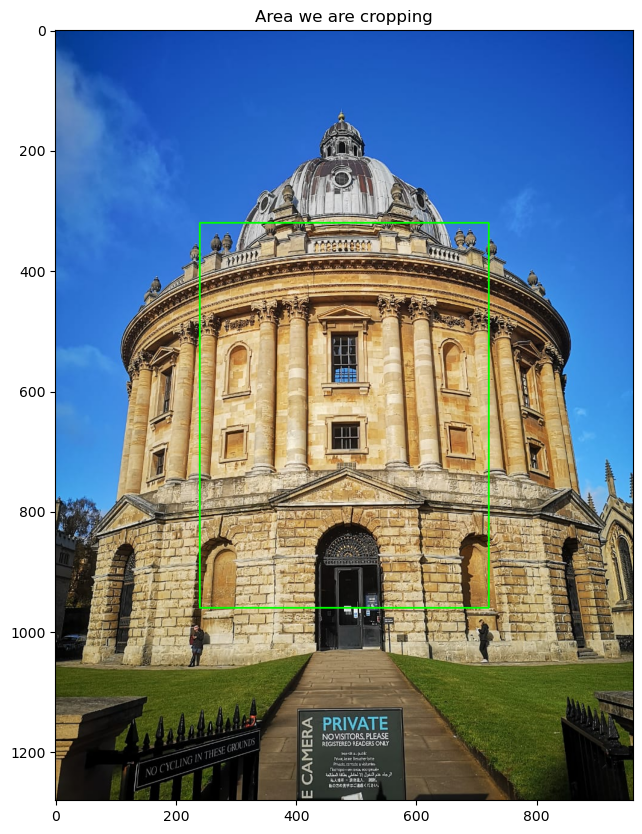

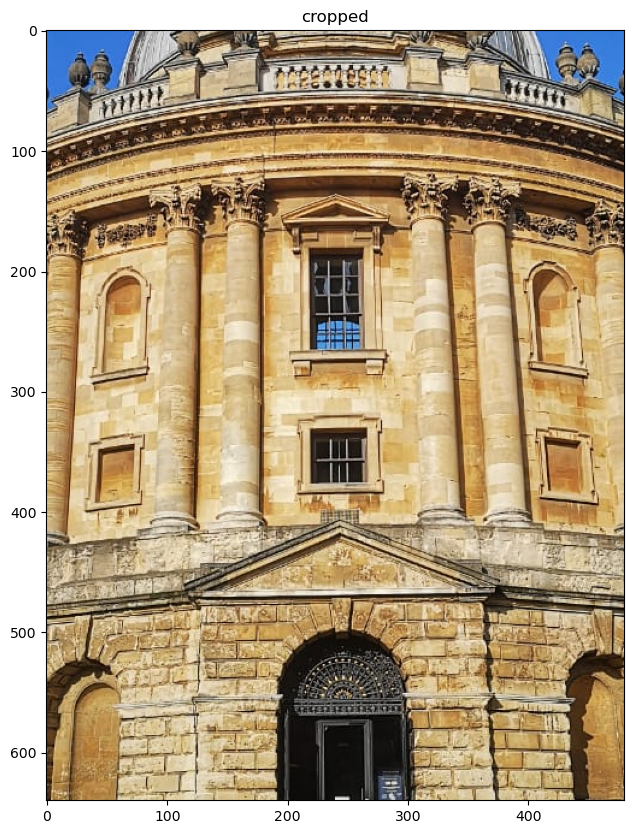

In [7]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\oxfordlibrary.jpeg')

#Get the image dimensions
height, width = image.shape[:2]

#Let's get the starting pixel coordiantes (top left of cropping rectangle)
#using 0.25 to get the x,y starting positions
start_row, start_col = int(height * .25), int(width * .25)

#Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

#Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row, start_col:end_col]
imshow('original image', image)

#The cv2.rectangle function is used to draw a rectangle on any image
copy = image.copy()
cv2.rectangle(copy, (start_col, start_row), (end_col, end_row), (0,255,0), 2)

imshow('Area we are cropping', copy)
imshow('cropped',cropped)